In [44]:
import polars as pl
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
# Path to the Parquet file
file_path = r"D:\20241207_week5_products_uav_data\output\extract\20241207_week5_project_54_IMG_0054_6.tif.parquet"

# Load the Parquet file into a Polars DataFrame
df = pl.read_parquet(file_path)

# Display the first few rowsSS
xcam = float(df[["xcam"][0]][0])
ycam = float(df[["ycam"][0]][0])
zcam = float(df[["delta_z"][0]][0]+df[["elev"][0]][0])

df


Xw,Yw,band1,band2,band3,band4,band5,elev,plot_id,delta_z,delta_x,delta_y,distance_xy,angle_rad,vza,vaa_rad,vaa_temp,vaa,xcam,ycam,sunelev,saa,path
f64,f64,f32,f32,f32,f32,f32,f32,str,f32,f64,f64,f64,f32,f32,f64,f64,f64,f32,f32,f32,f32,str
563625.29839,5.7130e6,0.022609,0.068494,0.023982,0.16201,0.654759,187.891159,"""plot_6""",19.671631,-1.98589,21.499493,21.591016,0.738915,47.66,-0.092108,-205.907991,154.092009,563623.3125,5713050.5,34.961594,200.6306,"""IMG_0054_6.tif"""
563625.305694,5.7130e6,0.023495,0.06711,0.023385,0.184272,0.65404,187.896362,"""plot_6""",19.666428,-1.993194,21.499402,21.591598,0.73877,47.669998,-0.092445,-205.927314,154.072686,563623.3125,5713050.5,34.961594,200.6306,"""IMG_0054_6.tif"""
563625.312998,5.7130e6,0.024709,0.082363,0.023764,0.222172,0.702596,187.902161,"""plot_6""",19.660629,-2.000498,21.49931,21.592182,0.73861,47.68,-0.092782,-205.946635,154.053365,563623.3125,5713050.5,34.961594,200.6306,"""IMG_0054_6.tif"""
563625.320302,5.7130e6,0.023902,0.097644,0.026093,0.249312,0.754782,187.908829,"""plot_6""",19.653961,-2.007802,21.499218,21.592769,0.738428,47.689999,-0.093119,-205.965956,154.034044,563623.3125,5713050.5,34.961594,200.6306,"""IMG_0054_6.tif"""
563625.327606,5.7130e6,0.023138,0.110084,0.027688,0.267228,0.762506,187.915588,"""plot_6""",19.647202,-2.015106,21.499127,21.593358,0.738243,47.700001,-0.093457,-205.985275,154.014725,563623.3125,5713050.5,34.961594,200.6306,"""IMG_0054_6.tif"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
563626.079675,5.7130e6,NaN,NaN,NaN,NaN,NaN,188.015778,"""plot_3""",19.547012,-2.767175,29.036062,29.167622,0.590418,56.169998,-0.095014,-206.074525,153.925475,563623.3125,5713050.5,34.961594,200.6306,"""IMG_0054_6.tif"""
563626.086979,5.7130e6,NaN,NaN,NaN,NaN,NaN,188.01207,"""plot_3""",19.55072,-2.774479,29.035971,29.168225,0.590496,56.169998,-0.095264,-206.088826,153.911174,563623.3125,5713050.5,34.961594,200.6306,"""IMG_0054_6.tif"""
563626.094283,5.7130e6,NaN,NaN,NaN,NaN,NaN,188.008347,"""plot_3""",19.554443,-2.781783,29.035879,29.168829,0.590575,56.16,-0.095514,-206.103125,153.896875,563623.3125,5713050.5,34.961594,200.6306,"""IMG_0054_6.tif"""


(563622.8039845076, 563633.9913253409, 5713019.985376171, 5713051.953077326)

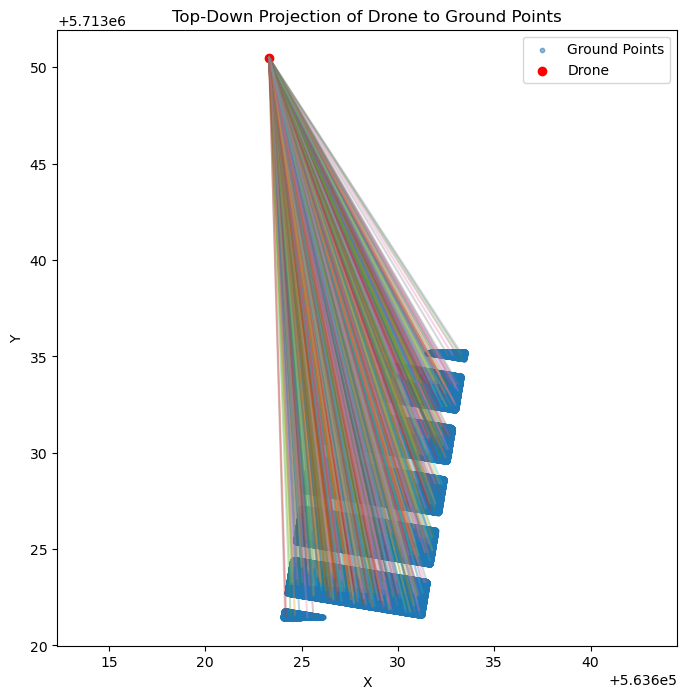

In [45]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(df["Xw"], df["Yw"], s=10, alpha=0.5, label="Ground Points")
plt.scatter([xcam], [ycam], c='red', label="Drone")

# Draw view vectors
for i in range(0, len(df), 1000):  # Use step to avoid clutter
    plt.plot([xcam, df["Xw"][i]], [ycam, df["Yw"][i]], alpha=0.3)

plt.legend()
plt.title("Top-Down Projection of Drone to Ground Points")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis("equal")


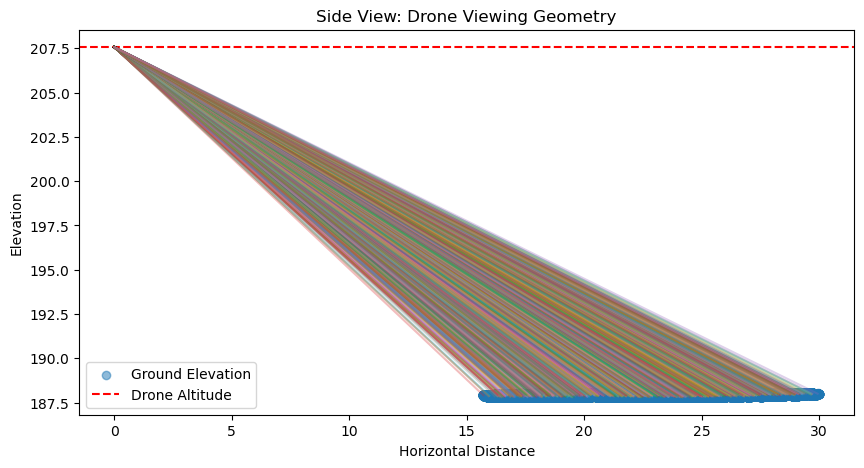

In [46]:
plt.figure(figsize=(10, 5))
plt.scatter(df["distance_xy"], df["elev"], label="Ground Elevation", alpha=0.5)
plt.axhline(zcam, color='red', linestyle='--', label="Drone Altitude")

for i in range(0, len(df), 1000):
    plt.plot([0, df["distance_xy"][i]], [zcam, df["elev"][i]], alpha=0.3)

plt.xlabel("Horizontal Distance")
plt.ylabel("Elevation")
plt.title("Side View: Drone Viewing Geometry")
plt.legend()


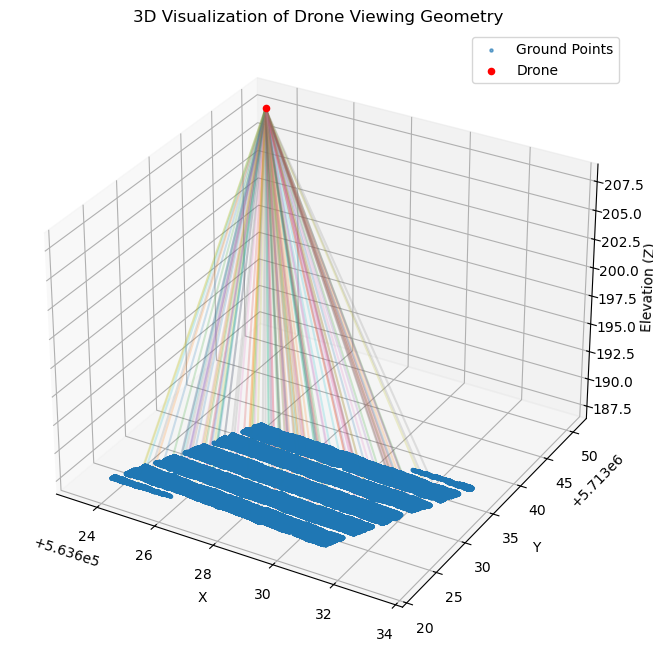

In [47]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Ground points
ax.scatter(df["Xw"], df["Yw"], df["elev"], s=5, alpha=0.6, label="Ground Points")

# Drone position
ax.scatter([xcam], [ycam], [zcam], c='red', label="Drone")

# Viewing rays
for i in range(0, len(df), 10000):
    ax.plot(
        [xcam, df["Xw"][i]],
        [ycam, df["Yw"][i]],
        [zcam, df["elev"][i]],
        alpha=0.2
    )

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Elevation (Z)")
ax.set_title("3D Visualization of Drone Viewing Geometry")
ax.legend()


(0.0, 56.900001525878906)

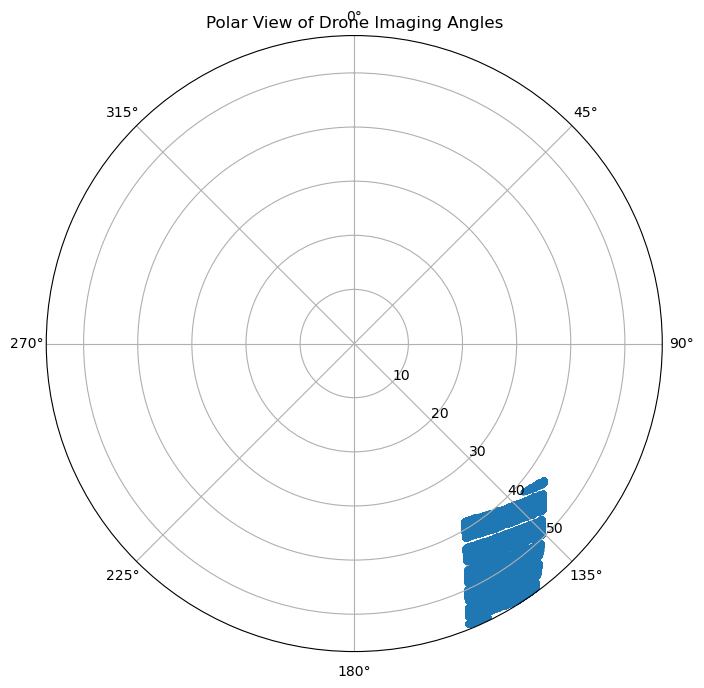

In [50]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)

# Convert angles to radians if needed
theta = np.deg2rad(df["vaa"])  # Azimuth angle in radians
r = df["vza"]  # Radial: zenith angle

ax.scatter(theta, r, s=10, alpha=0.6)

ax.set_theta_zero_location("N")  # 0° at the top (North)
ax.set_theta_direction(-1)       # Clockwise direction (East = 90°)
ax.set_title("Polar View of Drone Imaging Angles")

ax.set_rlabel_position(135)  # Move radial labels to a readable spot
ax.set_rlim(0, max(r))       # Optional: set max radial limit
